In [1]:
!pip install pytrends

  Obtaining dependency information for pytrends from https://files.pythonhosted.org/packages/68/ba/7a24a3723c790000faf880505ff1cc46f4d29f46dd353037938a070c4d23/pytrends-4.9.2-py3-none-any.whl.metadata


In [10]:
!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

  Cloning https://github.com/GeneralMills/pytrends to c:\users\dell\appdata\local\temp\pip-req-build-e5ptcbe9
  Resolved https://github.com/GeneralMills/pytrends to commit a9984ffdc9b31d853dde2ab614a77ecbf2bf33a1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/GeneralMills/pytrends 'C:\Users\Dell\AppData\Local\Temp\pip-req-build-e5ptcbe9'


# Pytrends
Unofficial API for Google Trends. Allows simple interface for automating downloading of reports from Google Trends.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pytrends.request import TrendReq
Trending_topics = TrendReq(hl='en-US', tz=360)

In [2]:
kw_list=["Cloud Computing"] 

# build payload
creating dataframe of top 10 countries that search the terms 'Data Science'.

For this build payload is used which allows storing a list of keywords that you want to search. 

you can also specify the timeframe and the category to query the data from. 

In [2]:
kw_list=["Cloud Computing"] 
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')

# Interest Over Time
The interest_over_time() method, returns the historical, indexed data for when the specified keyword was most searched according to the timeframe mentioned in the build payload method.

In [9]:
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')
data = Trending_topics.interest_over_time() 
data = data.sort_values(by="Cloud Computing", ascending = False) 
data = data.head(10) 
data

,Cloud Computing,isPartial
date,,
2023-12-03,100,False
2023-12-10,91,False
2024-01-28,89,False
2023-11-26,86,False
2023-10-08,85,False
2023-11-19,84,False
2023-10-15,84,False
2023-10-29,84,False
2024-02-04,83,False


In [3]:
import time
time.sleep(60)  # Sleep for 60 seconds

# Interest By Region
It is used to know the performance of the keyword per region. It will show results on a scale of 0-100, where 100 indicates the country with the most search and 0 indicates with least search or not enough data. 

In [3]:
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m', geo='', gprop='')
datar = Trending_topics.interest_by_region() 
datar = datar.sort_values(by="Cloud Computing", ascending = False) 
datar = datar.head(10) 
datar

,Cloud Computing
geoName,
Ethiopia,100
Nepal,85
Zimbabwe,77
India,75
Cameroon,59
Sri Lanka,52
Ghana,51
Kenya,46
South Korea,42


In [4]:
datar.reset_index()

,geoName,Cloud Computing
0,Ethiopia,100
1,Nepal,85
2,Zimbabwe,77
3,India,75
4,Cameroon,59
5,Sri Lanka,52
6,Ghana,51
7,Kenya,46
8,South Korea,42
9,Nigeria,42


In [5]:
datar.columns

Index(['Cloud Computing'], dtype='object')

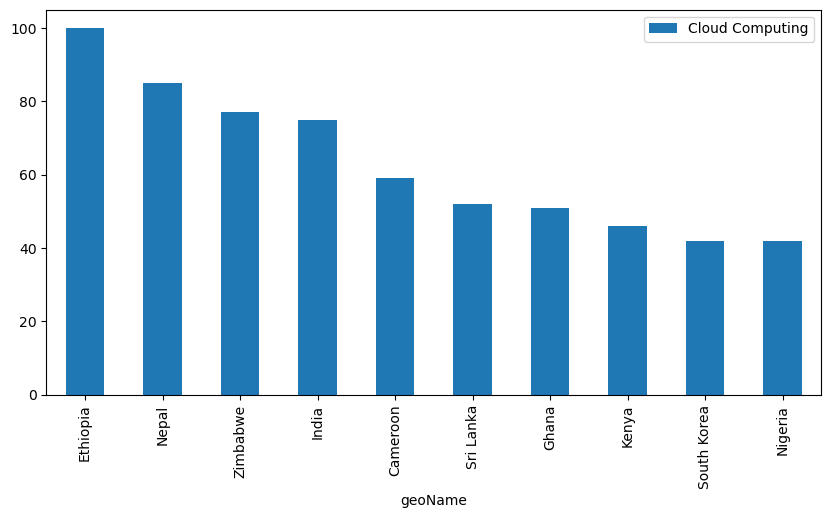

In [6]:
datar.reset_index().plot(x='geoName', y='Cloud Computing', figsize=(10,5), kind="bar") 
plt.style.use('fivethirtyeight') 
plt.show()

# Top Charts
Using this method, we can get the top trending searches yearly. 

In [33]:
df = Trending_topics.top_charts(2020, hl='en-US', tz=300, geo='GLOBAL') 
df.head(10) 

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


# Related Queries
Whenever a user searches for something about a particular topic on Google there is a high probability that the user will search for more queries related to the same topic. These are known as related queries. 

In [10]:
Trending_topics.build_payload(kw_list=['Cloud Computing']) 
related_queries = Trending_topics.related_queries() 
related_queries.values()

IndexError: list index out of range

# Keyword Suggestions
The suggestions() method help you to explore what the world is searching for. It returns a list of additional suggested keywords that can be used to filter a trending search on Google.

In [40]:
keywords = Trending_topics.suggestions( 
keyword='Cloud Computing') 
df = pd.DataFrame(keywords) 
df.drop(columns= 'mid') 

,title,type
0,Cloud computing,Topic
1,Cloud computing security,Topic
2,Alibaba Cloud,Computer software company
3,Cloud computing,Topic
4,Private cloud computing infrastructure,Topic
